## Neural Network Classifier for the cancer diagnosis

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import tensorflow as tf

In [ ]:
project_path = ""
data_path = project_path + "data/"

In [ ]:
data_df = pd.read_csv(data_path + "data.csv")
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
columns_to_drop = ["id", "Unnamed: 32"]
data_df = data_df.drop(columns=columns_to_drop, axis = 1)

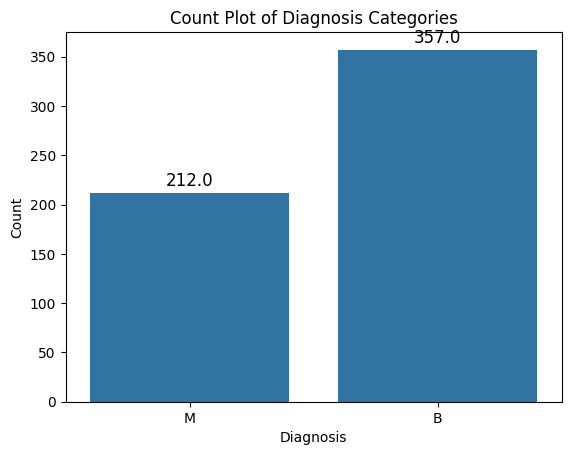

In [ ]:
ax = sns.countplot(x="diagnosis", data=data_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count Plot of Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
y = data_df["diagnosis"].values
labelencoder = LabelEncoder()
labelencoder = labelencoder.fit(y)
Y = labelencoder.transform(y)
print(np.unique(Y))

[0 1]


In [ ]:
labelencoder.inverse_transform(np.array([0, 1]))

array(['B', 'M'], dtype=object)

In [ ]:
X = data_df.drop(columns = ["diagnosis"], axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(569, 30)

### Train Test Split

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)
print("Shape of training data is  : ", X_train.shape, y_train.shape)
print("Shape of validation data is : ", X_val.shape, y_val.shape)
print("Shape of test data is : ", X_test.shape, y_test.shape)

Shape of training data is  :  (455, 30) (455,)
Shape of validation data is :  (57, 30) (57,)
Shape of test data is :  (57, 30) (57,)


### Neural Network Clasisifer

In [ ]:
def get_model(input_dim: int, dropout: float, layer_width: int,
                 n_hidden_layers: int) -> tf.keras.Sequential:
    """Creates a Neural Network model for Anomaly Detection.

    Creates a simple stack of dense/dropout layers with equal width.

    Args:
      input_dim: width of the input layer
      dropout: dropout probability for each hidden layer
      layer_width: hidden layer width
      n_hidden_layers: number of hidden layers

    Returns:
      tf.keras.Sequential model.
    """
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.Dense(
            layer_width, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))

    for _ in range(n_hidden_layers):
      model.add(tf.keras.layers.Dense(layer_width, activation='relu'))
      model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=[tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        ])
    return model

In [ ]:
input_dim = X_train.shape[1]
dropout = 0.2
layer_width = 128
n_hidden_layers = 3

model = get_model(input_dim, dropout, layer_width, n_hidden_layers)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,633 (209.50 KB)

 Trainable params: 53,633 (209.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(455, 30) (57, 30) (57, 30)


In [ ]:
history = model.fit(X_train, y_train, verbose = 1, epochs = 10, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - auc: 0.7711 - binary_accuracy: 0.6384 - loss: 0.6670 - precision: 0.5181 - recall: 0.7565 - val_auc: 0.9796 - val_binary_accuracy: 0.8772 - val_loss: 0.5051 - val_precision: 0.8571 - val_recall: 0.8889
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.9536 - binary_accuracy: 0.8924 - loss: 0.4719 - precision: 0.8404 - recall: 0.8830 - val_auc: 0.9778 - val_binary_accuracy: 0.9123 - val_loss: 0.2412 - val_precision: 1.0000 - val_recall: 0.8148
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9483 - binary_accuracy: 0.8814 - loss: 0.2893 - precision: 0.8242 - recall: 0.8793 - val_auc: 0.9827 - val_binary_accuracy: 0.8596 - val_loss: 0.2906 - val_precision: 1.0000 - val_recall: 0.7037
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.9572 - binary_accuracy: 0.8918 - loss: 0.2610 - precision: 0.8912 - recall: 0.8143 - val_auc: 0.9914 - val_binary_accuracy: 0.9298 - val_loss: 0.1393 - val_precision: 1.0000 - 

In [ ]:
def plot_history(history, title="loss"):
  metric = history.history[title]
  val_metric = history.history[f'val_{title}']
  epochs = range(1, len(metric) + 1)
  plt.plot(epochs, metric, 'y', label=f"Training {title}")
  plt.plot(epochs, val_metric, 'r', label = f"Validation {title}")
  plt.title(f'Training and Validation {title}')
  plt.xlabel("Epochs")
  plt.ylabel(title)
  plt.legend()
  plt.show()


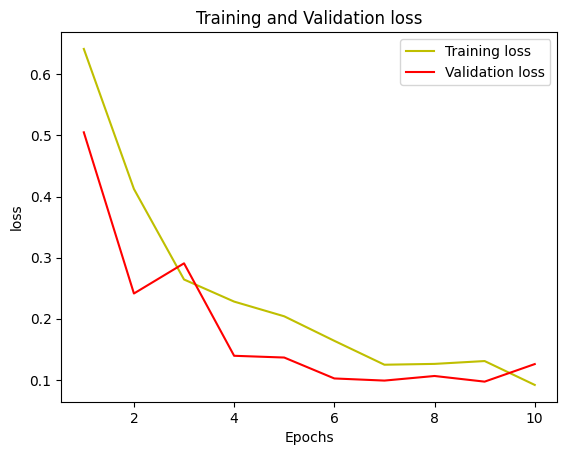

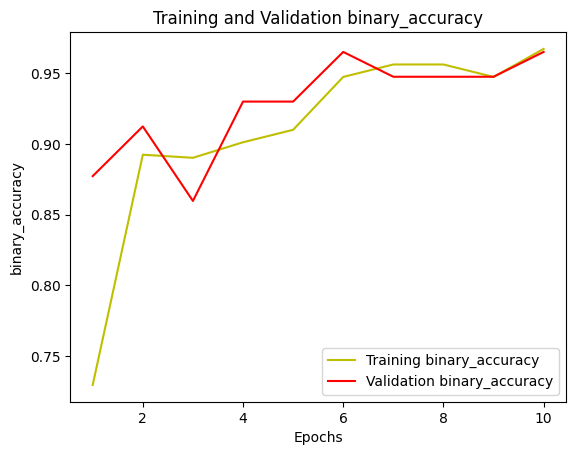

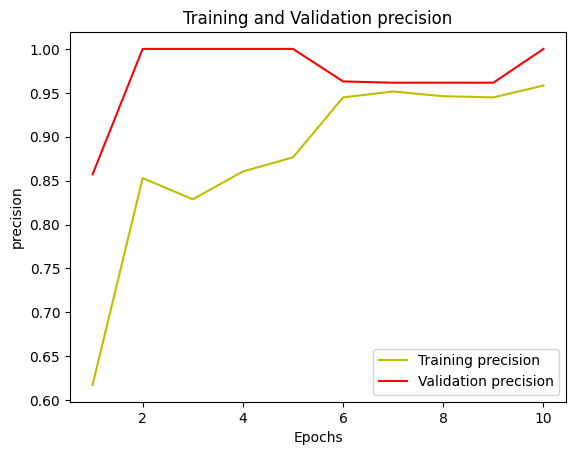

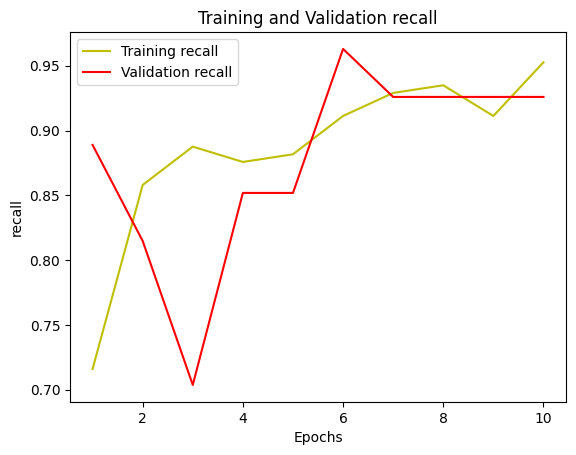

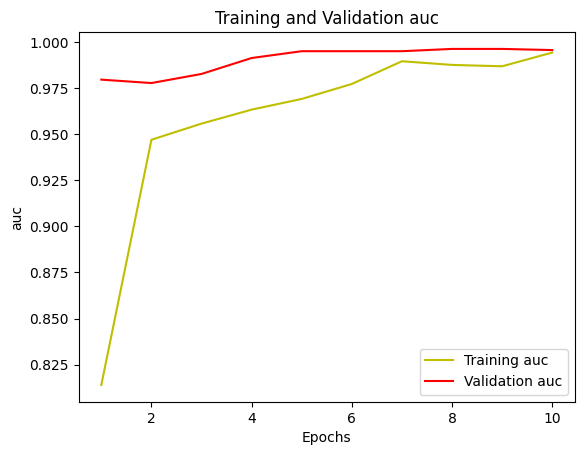

In [ ]:
metrics_list = ["loss", "binary_accuracy", "precision", "recall", "auc"]
for metric in metrics_list:
  plot_history(history, title = metric)

In [ ]:
def get_classification_report(y_true, y_pred, title = "classification report"):
  print(title)
  nn_classification_report = classification_report(y_true, y_pred)
  print(nn_classification_report)

def get_confusion_heatmap(y_true, y_pred, title = "confusion matrix"):
  nn_model_cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(nn_model_cm, annot = True)
  plt.title(title)
  plt.show()
  print()

In [ ]:
nn_train_predictions_prob = model.predict(X_train)
nn_val_predictions_prob = model.predict(X_val)
nn_test_predictions_prob = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
threshold = 0.5
nn_train_predictions = nn_train_predictions_prob > threshold
nn_val_predictions = nn_val_predictions_prob > threshold
nn_test_predictions = nn_test_predictions_prob > threshold

In [ ]:
get_classification_report(y_train, nn_train_predictions.ravel(), title = "train classification report")
get_classification_report(y_val, nn_val_predictions.ravel(), title = "val classification report")
get_classification_report(y_test, nn_test_predictions.ravel(), title = "test classification report")

train classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       286
           1       1.00      0.91      0.95       169

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.97      0.96      0.96       455

val classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.96        27

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57

test classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        16

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00    

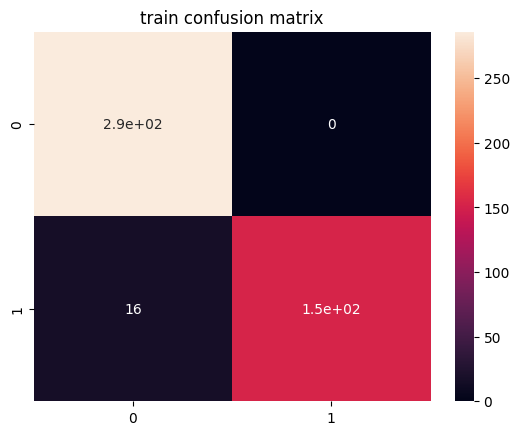

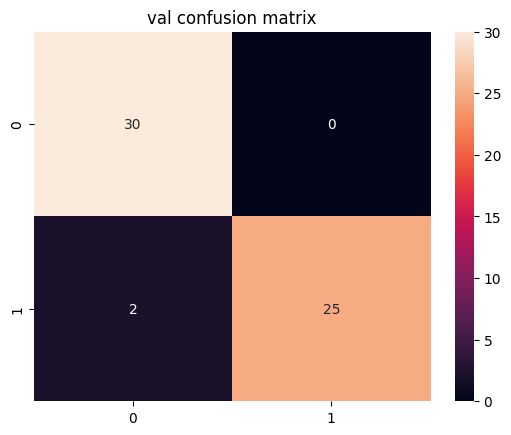

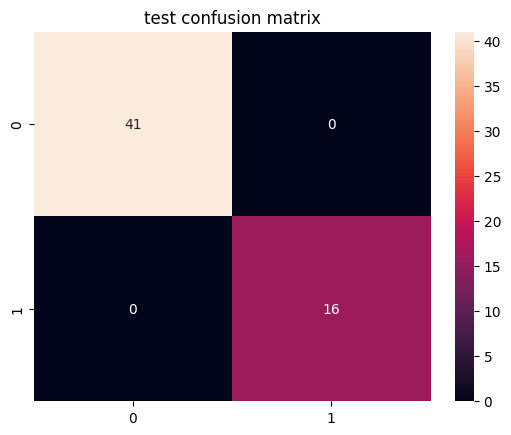

In [ ]:
get_confusion_heatmap(y_train, nn_train_predictions.ravel(), title = "train confusion matrix")
get_confusion_heatmap(y_val, nn_val_predictions.ravel(), title = "val confusion matrix")
get_confusion_heatmap(y_test, nn_test_predictions.ravel(), title = "test confusion matrix")


### Calculate the threshold to maximize the recall

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import plotly.graph_objects as go

# Assuming y_val and nn_val_predictions_prob are already defined

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, nn_val_predictions_prob.ravel())
print(precision.shape, recall.shape, thresholds.shape)
thresholds = np.append(thresholds, 1)


# Find the index of the maximum recall
max_recall_index = np.argmax(recall)
optimal_threshold = thresholds[max_recall_index]

# Create an interactive plot using Plotly
fig = go.Figure()

# Add Precision-Recall Curve line
fig.add_trace(go.Scatter(
    x=recall,
    y=precision,
    mode='lines+markers',
    name='Precision-Recall Curve',
    marker=dict(size=5),
    hovertemplate='Threshold: %{customdata:.2f}<br>Precision: %{y:.2f}<br>Recall: %{x:.2f}<extra></extra>',
    customdata=thresholds
))

# Update layout
fig.update_layout(
    title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    template='plotly'
)

# Show the interactive plot
fig.show()

(58,) (58,) (57,)


### f1-score vs threshhold

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
import plotly.graph_objects as go

In [ ]:
def get_metric_vs_threshold(y_true, y_pred_prob, title):
  """
    title : f1_score, recall_score, precision_score
  """
  assert y_true.shape == y_pred_prob.shape
  threholds = np.arange(0, 1.0, 0.01)
  metric_scores = []
  for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    # print(type(y_true), type(y_pred), y_true.shape, y_pred.shape)
    if title == "f1_score":
      metric_score = f1_score(y_true, y_pred)
    elif title == "recall_score":
      metric_score = recall_score(y_true, y_pred)
    elif title == "precision_score":
      metric_score = precision_score(y_true, y_pred)
    else:
      raise ValueError("Invalid title")
    metric_scores.append(metric_score)

  return thresholds, np.array(metric_scores)

def plot_metric_vs_threshold(thresholds, metric_scores, title):
  plt.figure(figsize=(10, 6))
  plt.plot(thresholds, metric_scores, marker='o', label=title)

  plt.xlabel('Threshold')
  plt.ylabel(title)
  plt.title(f'{title} vs. threshold')
  plt.legend()
  plt.grid(True)
  plt.show()
  print()

In [ ]:
y_val.shape, nn_val_predictions_prob.shape

((57,), (57, 1))

In [ ]:
thresholds, f1_score = get_metric_vs_threshold(y_val, nn_val_predictions_prob.ravel(), title="f1_score")
thresholds, recall_score = get_metric_vs_threshold(y_val, nn_val_predictions_prob.ravel(), title="recall_score")
thresholds, precision_score = get_metric_vs_threshold(y_val, nn_val_predictions_prob.ravel(), title="precision_score")

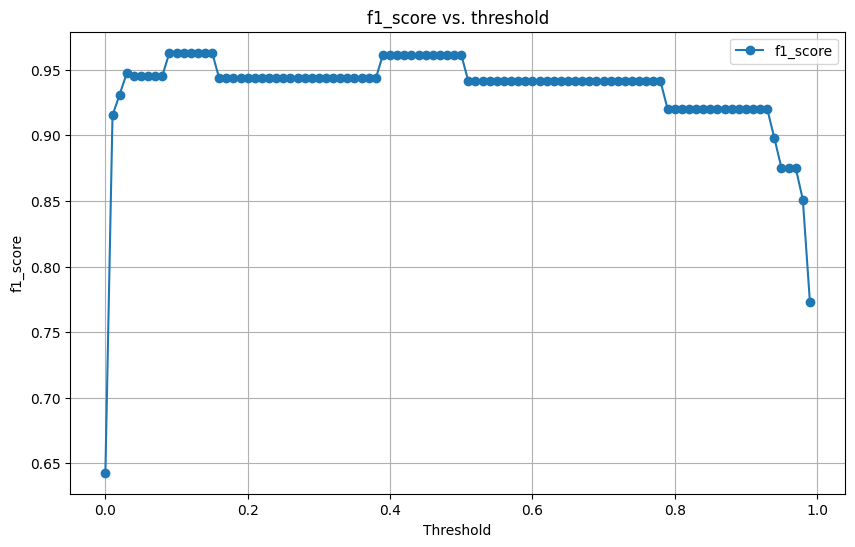

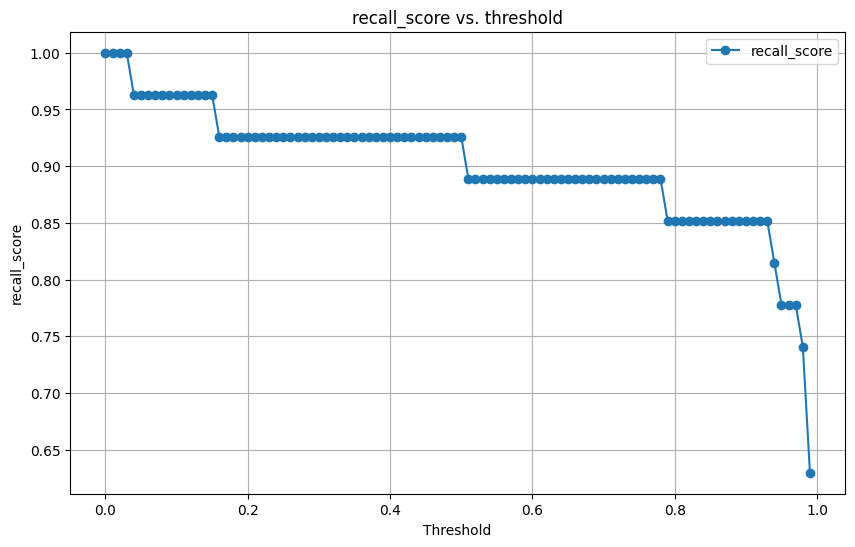

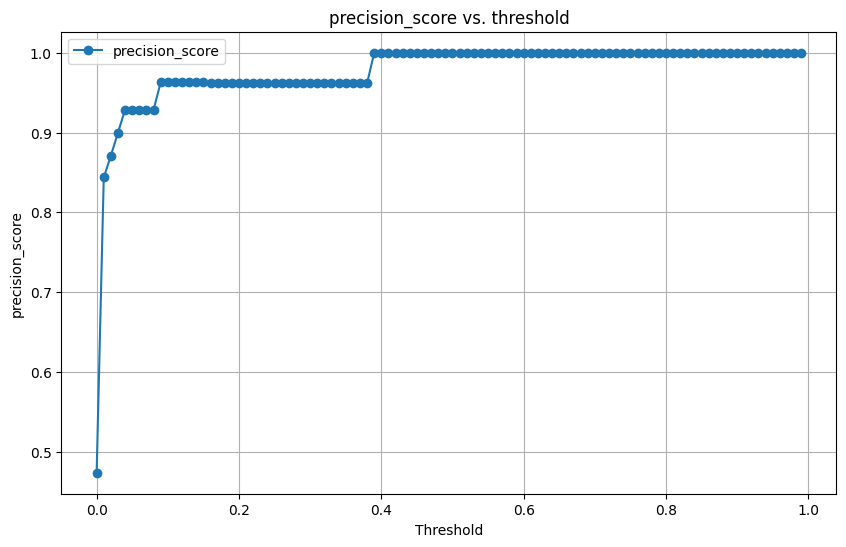

In [ ]:
plot_metric_vs_threshold(thresholds, f1_score, title="f1_score")
plot_metric_vs_threshold(thresholds, recall_score, title="recall_score")
plot_metric_vs_threshold(thresholds, precision_score, title="precision_score")

**From f1 score vs threshold plot, the threshold around 0.4 to 0.5 seems to be reasonable.**

In [ ]:
precision_score.shape, recall_score.shape, thresholds.shape

((100,), (100,), (100,))

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    # Create a scatter plot for precision-recall curve
    fig = go.Figure()

    # Add the precision-recall curve
    fig.add_trace(go.Scatter(
        x=recalls,
        y=precisions,
        mode='lines+markers',
        marker=dict(size = 5, opacity = 0.7),
        line = dict(width = 2),
        text=[f"Threshold: {t:.4f}<br>Precision: {p:.4f}<br>Recall: {r:.4f}"
              for t, p, r in zip(thresholds, precisions, recalls)],
        hoverinfo='text'
    ))

    # Set labels and title
    fig.update_layout(
        title="Precision-Recall Curve",
        xaxis_title="Recall",
        yaxis_title="Precision",
        template="plotly"
    )

    fig.show()

In [ ]:
precision_recall_curve(precision_score, recall_score, thresholds)